In [2]:
from google.colab import files
uploaded = files.upload()

Saving appstore_games.csv to appstore_games.csv


# Importing 'pandas' and 'matplotlib'

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating the DataFrame

In [0]:
df=pd.read_csv('appstore_games.csv')

In [98]:
# checking for number of null values in each column
df.isnull().sum()

URL                                 0
ID                                  0
Name                                0
Subtitle                        11746
Icon URL                            0
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Description                         0
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

In [8]:
#Filtering the dataset
highRated=df[df['Average User Rating']>=4.0].loc[:,['ID','Name','Average User Rating','User Rating Count','Price','Age Rating','Size','Primary Genre','Genres']]

#Sorting dataset according to Rating and reseting index
highRated=highRated.sort_values(['Average User Rating','User Rating Count'],ascending=[False,False])
highRated=highRated.reset_index(drop=True)
highRated.shape

(5573, 9)

So, total 5573 apps in the dataframe have have rating of 4 and above.
So, we'll proceed with the analysis of these 5573 apps.

In [100]:
# checking for number of null values in the filtered dataframe
highRated.isnull().sum()

ID                     0
Name                   0
Average User Rating    0
User Rating Count      0
Price                  0
Age Rating             0
Size                   0
Primary Genre          0
Genres                 0
dtype: int64

Hence, there are no null values in the filtered dataframe.

# Analysis based on Price

In [9]:
hrFree=highRated[highRated.Price==0]
hrPaid=highRated[highRated.Price!=0]
print(hrFree.shape)
print(hrPaid.shape)

(4685, 9)
(888, 9)


In [10]:
(4685/5573)*100

84.0660326574556

Hence, 84.1 % high rated apps are FREE.

In [11]:
#plt.plot(range(1,889),hrPaid['Price'])
#plt.ylim(0,20)
#plt.ylabel('Price in $')
hrPaid['Price'].value_counts()

0.99      228
2.99      183
1.99      148
4.99      140
3.99       83
9.99       37
6.99       19
5.99       18
8.99       11
7.99        8
19.99       4
11.99       2
12.99       2
59.99       1
36.99       1
14.99       1
139.99      1
16.99       1
Name: Price, dtype: int64

From above plot, If the app is paid, it's price must be within $5.

In [12]:
hrFree['Average User Rating'].mean()

4.439807897545357

In [13]:
hrPaid['Average User Rating'].mean()

4.405405405405405

Hence, FREE apps have higher avg rating than PAID apps.

In [14]:
#Avg Rating of Apps of price $0.99
hrP1=hrPaid[hrPaid['Price']==0.99]
hrP1['Average User Rating'].mean()

4.3881578947368425

In [15]:
#Avg Rating of Apps of price $1.99
hrP2=hrPaid[hrPaid['Price']==1.99]
hrP2['Average User Rating'].mean()

4.422297297297297

In [16]:
#Avg Rating of Apps of price $2.99
hrP3=hrPaid[hrPaid['Price']==2.99]
hrP3['Average User Rating'].mean()

4.420765027322404

In [17]:
#Avg Rating of Apps of price $3.99
hrP4=hrPaid[hrPaid['Price']==3.99]
hrP4['Average User Rating'].mean()

4.4156626506024095

In [18]:
#Avg Rating of Apps of price $4.99
hrP5=hrPaid[hrPaid['Price']==4.99]
hrP5['Average User Rating'].mean()

4.414285714285715

Amongst Paid apps, apps with price of \$2 and \$3 have the highest avg rating.

# Analysis based on Genres

### Finding the most common Genres

In [19]:
gnr=highRated['Genres'].value_counts()
gnr.head(50)

Games, Simulation, Strategy                     207
Games, Strategy, Simulation                     206
Games, Strategy, Puzzle                         202
Games, Strategy, Action                         200
Games, Puzzle, Strategy                         172
Games, Action, Strategy                         164
Games, Strategy                                 161
Games, Strategy, Role Playing                   150
Games, Role Playing, Strategy                   138
Games, Strategy, Puzzle, Entertainment          108
Games, Strategy, Entertainment, Puzzle           95
Games, Puzzle, Strategy, Entertainment           94
Games, Board, Strategy                           92
Games, Entertainment, Puzzle, Strategy           89
Games, Strategy, Board                           82
Games, Casual, Strategy                          79
Games, Action, Strategy, Entertainment           78
Games, Strategy, Entertainment, Simulation       77
Games, Strategy, Casual                          76
Games, Strat

From above table, the most common genres of high rates apps are - Puzzle , Simulation , Action , Role Playing , Board , Casual , Adventure , Card
Next, we'll form dataframes for these genres and analyse them separately

In [0]:
#Creating separate dataframes for the most common genres
hrSimulation=highRated[highRated['Genres'].str.contains('Simulation')]
hrSimulation=hrSimulation.reset_index(drop=True)

hrPuzzle=highRated[highRated['Genres'].str.contains('Puzzle')]
hrPuzzle=hrPuzzle.reset_index(drop=True)

hrAction=highRated[highRated['Genres'].str.contains('Action')]
hrAction=hrAction.reset_index(drop=True)

hrRolePlaying=highRated[highRated['Genres'].str.contains('Role Playing')]
hrRolePlaying=hrRolePlaying.reset_index(drop=True)

hrBoard=highRated[highRated['Genres'].str.contains('Board')]
hrBoard=hrBoard.reset_index(drop=True)

hrCasual=highRated[highRated['Genres'].str.contains('Casual')]
hrCasual=hrCasual.reset_index(drop=True)

hrAdventure=highRated[highRated['Genres'].str.contains('Adventure')]
hrAdventure=hrAdventure.reset_index(drop=True)

hrCard=highRated[highRated['Genres'].str.contains('Card')]
hrCard=hrCard.reset_index(drop=True)

### Puzzle Games

In [21]:
hrPuzzle.shape

(1033, 9)

There are 1033 Puzzle games with rating 4 or above.

In [22]:
hrPuzzle['Average User Rating'].mean()

4.504356243949661

Text(0, 0.5, 'Size in 100 MBs')

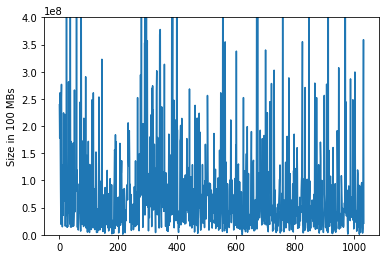

In [23]:
plt.plot(range(1,1034),hrPuzzle['Size'])
plt.ylim(0,400000000)
plt.ylabel('Size in 100 MBs')

In [24]:
hrPuzzle['Size'].mean()

80702624.72894482

The size of high rated Puzzle games should be less than or around 100 MB.

In [25]:
hrPuzzle['Price'].value_counts()

0.00    872
0.99     71
2.99     44
1.99     29
4.99      8
3.99      5
8.99      2
9.99      1
5.99      1
Name: Price, dtype: int64

In [26]:
(872/1033)*100

84.41432720232332

More than 84 % Puzzle games are FREE.

For Paid Puzzle games, Price must be below $3.

In [27]:
hrPuzzle['Age Rating'].value_counts()


4+     889
9+      74
12+     49
17+     21
Name: Age Rating, dtype: int64

The Age Rating of Puzzle games must be 4+.

### Simulation Games

In [28]:
hrSimulation.shape

(874, 9)

There are 874 Simulation games with rating 4 or above.

In [29]:
hrSimulation['Average User Rating'].mean()

4.4016018306636155

Text(0, 0.5, 'Size in 100 MBs')

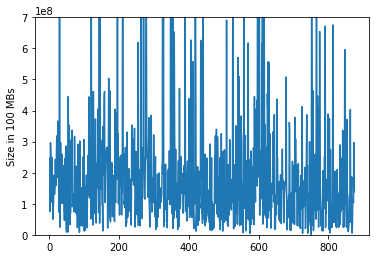

In [30]:
plt.plot(range(1,875),hrSimulation['Size'])
plt.ylim(0,700000000)
plt.ylabel('Size in 100 MBs')

In [31]:
hrSimulation['Size'].mean()

196701094.00572082

The size of high rated Simulation games must be less than 200 MB and could be safely extended upto 300 MB.

In [32]:
hrSimulation['Price'].value_counts()

0.00      697
2.99       45
4.99       37
0.99       31
1.99       23
3.99       17
5.99        7
9.99        6
8.99        4
6.99        4
11.99       1
139.99      1
7.99        1
Name: Price, dtype: int64

In [33]:
(697/874)*100

79.74828375286042

Almost 80 % Simulation games are FREE.

For Paid Simulation games, Price must be below $5.

In [34]:
hrSimulation['Age Rating'].value_counts()

4+     468
12+    202
9+     169
17+     35
Name: Age Rating, dtype: int64

The Age Rating of Simulation games must be 4+, 9+ or 12+.

### Action Games

In [35]:
hrAction.shape

(803, 9)

There are 803 Action games with rating 4 or above.

In [36]:
hrAction['Average User Rating'].mean()

4.419053549190536

Text(0, 0.5, 'Size in GBs')

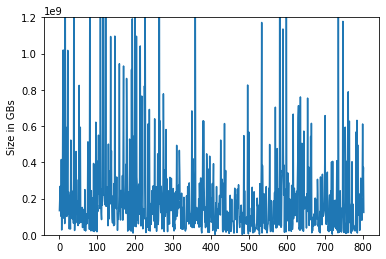

In [37]:
plt.plot(range(1,804),hrAction['Size'])
plt.ylim(0,1200000000)
plt.ylabel('Size in GBs')

In [38]:
hrAction['Size'].mean()

221544174.06351182

The size of high rated Action games should be less than or around 250 MB but they can be of size upto 1 GB.

In [39]:
hrAction['Price'].value_counts()

0.00    695
2.99     27
1.99     24
0.99     23
4.99     22
3.99      7
9.99      2
5.99      2
6.99      1
Name: Price, dtype: int64

In [40]:
(695/803)*100

86.55043586550435

More than 86 % Action games are FREE.

For Paid Action games, Price must be below $5.

In [41]:
hrAction['Age Rating'].value_counts()


9+     282
12+    265
4+     202
17+     54
Name: Age Rating, dtype: int64

The Age Rating of Puzzle games can be 4+, 9+ or 12+ but 17+ can also be logical option in some cases.

### Role Playing Games

In [42]:
hrRolePlaying.shape

(616, 9)

There are 616 Role Playing games with rating 4 or above.

In [43]:
hrRolePlaying['Average User Rating'].mean()

4.404220779220779

Text(0, 0.5, 'Size in GBs')

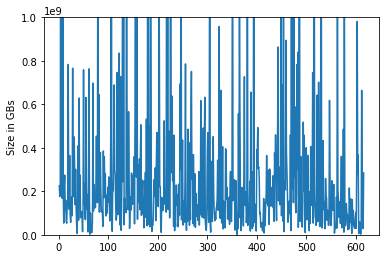

In [44]:
plt.plot(range(1,617),hrRolePlaying['Size'])
plt.ylim(0,1000000000)
plt.ylabel('Size in GBs')

In [45]:
hrRolePlaying['Size'].mean()

290496903.45616883

The size of high rated RolePlaying games should preferably be less than or around 350 MB but they can be of size upto 700 MB.

In [46]:
hrRolePlaying['Price'].value_counts()

0.00    508
0.99     30
9.99     17
3.99     16
4.99     16
2.99     12
1.99     10
6.99      3
7.99      2
5.99      2
Name: Price, dtype: int64

In [47]:
(508/616)*100

82.46753246753246

More than 82 % Role Playing games are FREE.

For Paid Role Playing games, Price must be below $5.

In [48]:
hrRolePlaying['Age Rating'].value_counts()


12+    247
9+     218
4+     128
17+     23
Name: Age Rating, dtype: int64

The Age Rating of Role Playing games can be 4+, 9+ or 12+.

### Board Games

In [49]:
hrBoard.shape

(545, 9)

There are 545 Board games with rating 4 or above.

In [50]:
hrBoard['Average User Rating'].mean()

4.3807339449541285

Text(0, 0.5, 'Size in GBs')

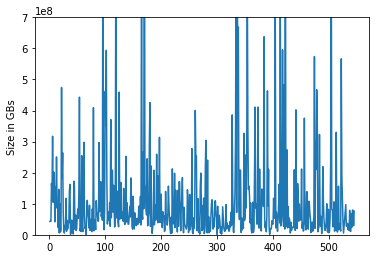

In [51]:
plt.plot(range(1,546),hrBoard['Size'])
plt.ylim(0,700000000)
plt.ylabel('Size in GBs')

In [52]:
hrBoard['Size'].mean()

110345951.11009175

The size of high rated Board games should be less than or around 250 MB but they can be of size upto 400 MB.

In [53]:
hrBoard['Price'].value_counts()

0.00     391
4.99      33
0.99      26
1.99      25
2.99      19
3.99      17
9.99       9
6.99       8
7.99       5
19.99      4
5.99       3
11.99      1
36.99      1
8.99       1
12.99      1
16.99      1
Name: Price, dtype: int64

In [54]:
(391/545)*100

71.74311926605505

Almost 72 % Board games are FREE.

For Paid Board games, Price must be below $5.

In [55]:
hrBoard['Age Rating'].value_counts()


4+     418
12+     62
9+      55
17+     10
Name: Age Rating, dtype: int64

The Age Rating of Board games must preferably be 4+.

### Casual Games

In [56]:
hrCasual.shape

(414, 9)

There are 414 Casual games with rating 4 or above.

In [57]:
hrCasual['Average User Rating'].mean()

4.526570048309178

Text(0, 0.5, 'Size in GBs')

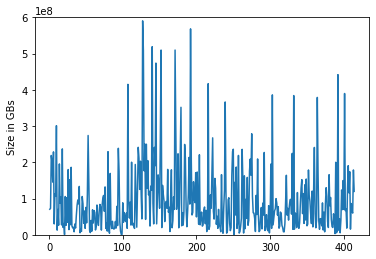

In [58]:
plt.plot(range(1,415),hrCasual['Size'])
plt.ylim(0,600000000)
plt.ylabel('Size in GBs')

In [59]:
hrCasual['Size'].mean()

95697903.8236715

The size of high rated Casual games should be less than or around 100 MB but they can be of size upto 250 MB.

In [60]:
hrCasual['Price'].value_counts()

0.00    393
0.99     10
2.99      7
1.99      2
9.99      1
4.99      1
Name: Price, dtype: int64

In [61]:
(393/414)*100

94.92753623188406

Almost 95 % Casual games are FREE.

For Paid Casual games, Price must be below $3.

In [62]:
hrCasual['Age Rating'].value_counts()


4+     298
9+      67
12+     38
17+     11
Name: Age Rating, dtype: int64

The Age Rating of Casual games can be 4+, 9+ or 12+.

### Adventure Games

In [63]:
hrAdventure.shape

(261, 9)

There are 261 Adventure games with rating 4 or above.

In [64]:
hrAdventure['Average User Rating'].mean()

4.388888888888889

Text(0, 0.5, 'Size in GBs')

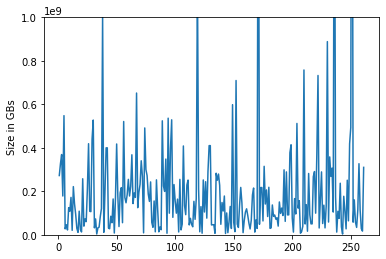

In [65]:
plt.plot(range(1,262),hrAdventure['Size'])
plt.ylim(0,1000000000)
plt.ylabel('Size in GBs')

In [66]:
hrAdventure['Size'].mean()

199964828.24137932

The size of high rated Casual games should be less than or around 200 MB but they can be of size upto 400 MB.

In [67]:
hrAdventure['Price'].value_counts()

0.00    217
1.99     11
4.99     11
2.99      9
0.99      6
3.99      5
5.99      1
6.99      1
Name: Price, dtype: int64

In [68]:
(217/261)*100

83.14176245210729

More than 83 % Casual games are FREE.

For Paid Casual games, Price must be below $5.

In [69]:
hrAdventure['Age Rating'].value_counts()


4+     130
9+      78
12+     45
17+      8
Name: Age Rating, dtype: int64

The Age Rating of Adventure games can be 4+, 9+ or 12+.

### Card Games

In [70]:
hrCard.shape

(278, 9)

There are 278 Card games with rating 4 or above.

In [71]:
hrCard['Average User Rating'].mean()

4.368705035971223

Text(0, 0.5, 'Size in GBs')

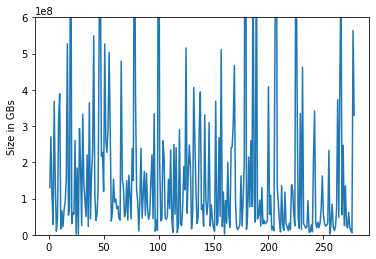

In [72]:
plt.plot(range(1,279),hrCard['Size'])
plt.ylim(0,600000000)
plt.ylabel('Size in GBs')

In [73]:
hrCard['Size'].mean()

161072801.02158272

The size of high rated Casual games should be less than or around 150 MB but they can be of size upto 300 MB.

In [74]:
hrCard['Price'].value_counts()

0.00     232
0.99      16
2.99       9
1.99       6
3.99       5
8.99       4
4.99       2
5.99       1
9.99       1
59.99      1
6.99       1
Name: Price, dtype: int64

In [75]:
(232/278)*100

83.45323741007195

MOre than 83 % Card games are FREE.

For Paid Card games, Price must be below $3.

In [76]:
hrCard['Age Rating'].value_counts()


4+     178
9+      46
12+     46
17+      8
Name: Age Rating, dtype: int64

The Age Rating of Casual games can be 4+, 9+ or 12+.

## Summarising the Genres into a DataFrame

In [0]:
d={
   'Genres':['Puzzle','Simulation','Action','Role Playing','Board','Casual','Adventure','Card'],
   'No. of apps':[1033,874,803,616,545,414,261,278],
   'Avg Rating':[4.5,4.4,4.42,4.4,4.38,4.53,4.39,4.37],
   'Prefered Size (in MBs)':[100,200,250,350,250,100,200,150],
   '%age of free apps':[84.4,79.7,86.6,82.5,71.7,94.9,83.1,83.5],
   'Prefered price below (in $)':[3,5,5,5,5,3,5,3],
   'Prefered Age Rating':['4+','4+,9+,12+','4+,9+,12+,17+','4+,9+,12+','4+','4+,9+,12+','4+,9+,12+','4+,9+,12+']
   }
gnrSum=pd.DataFrame(d)

<BarContainer object of 8 artists>

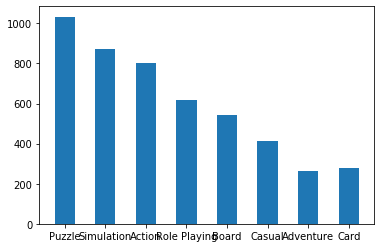

In [78]:
#gnrSum['No. of apps'].plot(kind='bar')
plt.bar(gnrSum['Genres'],gnrSum['No. of apps'],width=0.5)

# Inference



1. 84.1 % high rated apps are FREE.
2. FREE apps have higher avg rating than PAID apps.
3. Amongst Paid apps, apps with price of \$2 and \$3 have the highest avg rating.
4.  If the app is paid, it's price must be within $5.
5. The most common genre of high rated games is 'Puzzle' followed by 'Simulation' followed by 'Action' and so on.
6. The analysis based on genres is summarised in the dataframe 'gnrSum'.

In [79]:
gnrSum

,Genres,No. of apps,Avg Rating,Prefered Size (in MBs),%age of free apps,Prefered price below (in $),Prefered Age Rating
0,Puzzle,1033,4.50,100,84.4,3,4+
1,Simulation,874,4.40,200,79.7,5,"4+,9+,12+"
2,Action,803,4.42,250,86.6,5,"4+,9+,12+,17+"
3,Role Playing,616,4.40,350,82.5,5,"4+,9+,12+"
4,Board,545,4.38,250,71.7,5,4+
5,Casual,414,4.53,100,94.9,3,"4+,9+,12+"
6,Adventure,261,4.39,200,83.1,5,"4+,9+,12+"
7,Card,278,4.37,150,83.5,3,"4+,9+,12+"
